In [2]:
import polars as pl

# Load the labels data
labels_df = pl.read_csv("/Users/h33662/Projects/self/edth/data/labels/Flight1.csv")

# Load the raw logs data
logs_df = pl.read_csv("/Users/h33662/Projects/self/edth/data/raw/logs/Flight1.csv")

# Display basic information about the datasets
print("Labels dataset shape:", labels_df.shape)
print("Labels columns:", labels_df.columns)
print("\nLogs dataset shape:", logs_df.shape)
print("Logs columns:", logs_df.columns)


Labels dataset shape: (4801, 13)
Labels columns: ['frame_id', 'timestamp', 'qw', 'qx', 'qy', 'qz', 'wx_radDs', 'wy_radDs', 'wz_radDs', 'ax_mDs2', 'ay_mDs2', 'az_mDs2', 'system_time_s']

Logs dataset shape: (52402, 12)
Logs columns: ['timestamp', 'qw', 'qx', 'qy', 'qz', 'wx_radDs', 'wy_radDs', 'wz_radDs', 'ax_mDs2', 'ay_mDs2', 'az_mDs2', 'system_time_s']


In [1]:
import pandas as pd

df = pd.read_csv("/Users/h33662/Projects/self/edth/data/labels/Flight1.csv")

# timestamp is in microseconds -> seconds as float
df["timestamp_s"] = df["timestamp"] / 1e6
# relative to first sample
df["elapsed_from_start_s"] = df["timestamp_s"] - df.loc[0, "timestamp_s"]

In [4]:
160 - 120

40

In [9]:
1 / 30

0.03333333333333333

<Axes: >

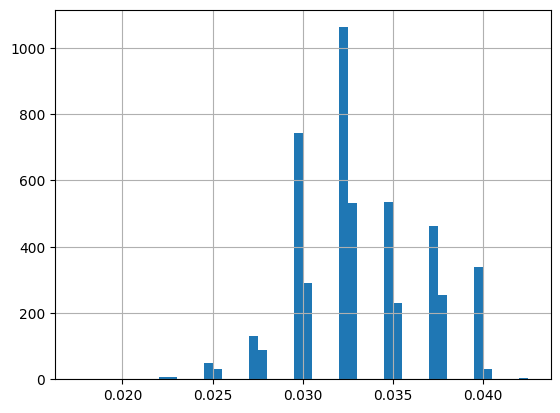

In [8]:
df["timestamp"].div(1e6).diff().hist(bins=50)

In [3]:
# Show first few rows of each dataset
print("\nFirst 5 rows of labels:")
print(labels_df.head())



First 5 rows of labels:
shape: (5, 13)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ frame_id ┆ timestamp ┆ qw        ┆ qx        ┆ … ┆ ax_mDs2   ┆ ay_mDs2   ┆ az_mDs2   ┆ system_ti │
│ ---      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ me_s      │
│ i64      ┆ i64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ ---       │
│          ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64       │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0        ┆ 202612660 ┆ 0.994456  ┆ -0.03862  ┆ … ┆ 2.018621  ┆ -0.685786 ┆ -8.26015  ┆ 2015.1247 │
│          ┆ 9         ┆           ┆           ┆   ┆           ┆           ┆           ┆ 83        │
│ 1        ┆ 202616149 ┆ 0.994851  ┆ -0.03864  ┆ … ┆ 1.767868  ┆ -0.738832 ┆ -7.315161 ┆ 2015.1568 │
│          ┆ 3         ┆           ┆           ┆   

In [5]:
labels_df

frame_id,timestamp,qw,qx,qy,qz,wx_radDs,wy_radDs,wz_radDs,ax_mDs2,ay_mDs2,az_mDs2,system_time_s
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,2026126609,0.994456,-0.03862,0.096379,-0.016458,0.059199,-0.112819,-0.022404,2.018621,-0.685786,-8.26015,2015.124783
1,2026161493,0.994851,-0.03864,0.091911,-0.017771,-0.018418,-0.400784,-0.085376,1.767868,-0.738832,-7.315161,2015.156834
2,2026188993,0.995385,-0.038488,0.085481,-0.019409,0.028376,-0.582675,-0.110315,1.356409,-0.829007,-5.797816,2015.188885
3,2026221639,0.996127,-0.038077,0.076107,-0.021534,0.086439,-0.617606,-0.118544,0.8378145,-0.943933,-3.8989,2015.220936
4,2026251493,0.9967798,-0.036448,0.067136,-0.023514,0.1363434,-0.550215,-0.091683,0.65677,-0.973704,-2.85828,2015.252988
…,…,…,…,…,…,…,…,…,…,…,…,…
4796,2185893518,0.833357,-0.502267,0.176753,-0.148086,0.6208925,0.366909,-0.194304,5.938025,-0.697129,-21.633861,2174.88994
4797,2185926225,0.836058,-0.495003,0.178637,-0.155141,0.275345,0.34955,-0.22804,6.079145,-1.194224,-21.815022,2174.921732
4798,2185963519,0.832548,-0.497998,0.181994,-0.160367,-0.4365,0.3592965,-0.244363,6.1183809,-1.000155,-22.166763,2174.953524


In [12]:
labels_df.select("frame_id", pl.col("timestamp").diff())

frame_id,timestamp
i64,i64
0,null
1,34884
2,27500
3,32646
4,29854
…,…
4796,32499
4797,32707
4798,37294


In [8]:
logs_df

timestamp,qw,qx,qy,qz,wx_radDs,wy_radDs,wz_radDs,ax_mDs2,ay_mDs2,az_mDs2,system_time_s
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2026113998,0.994335,-0.039308,0.097447,-0.015948,0.110566,-0.037882,0.001889,2.082521,-0.685528,-8.171474,2015.108757
2026118992,0.994349,-0.039078,0.097389,-0.01603,0.087918,-0.053981,-0.003436,2.069741,-0.68558,-8.18921,2015.111962
2026121494,0.994363,-0.038847,0.097331,-0.016113,0.082132,-0.067257,-0.016471,2.056961,-0.685631,-8.206945,2015.115167
2026124197,0.9943765,-0.038616,0.097273,-0.016195,0.074549,-0.085173,-0.016448,2.044181,-0.685683,-8.22468,2015.118373
2026126492,0.994416,-0.038618,0.096826,-0.016326,0.066967,-0.10309,-0.016424,2.031401,-0.685735,-8.242415,2015.121578
…,…,…,…,…,…,…,…,…,…,…,…
2186001019,0.829059,-0.500394,0.185925,-0.166345,-0.189925,0.368642,-0.211584,6.179097,-0.365734,-21.606401,2174.991096
2186006016,0.828813,-0.50054,0.186227,-0.166798,-0.090134,0.346892,-0.200012,6.184099,-0.307585,-21.540771,2174.993987
2186008519,0.828568,-0.500685,0.186528,-0.167251,-0.049251,0.352469,-0.197421,6.1891,-0.249435,-21.475142,2174.996877


In [4]:
print("\nFirst 5 rows of logs:")
print(logs_df.head())


First 5 rows of logs:
shape: (5, 12)
┌────────────┬───────────┬───────────┬──────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ timestamp  ┆ qw        ┆ qx        ┆ qy       ┆ … ┆ ax_mDs2  ┆ ay_mDs2   ┆ az_mDs2   ┆ system_ti │
│ ---        ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---      ┆ ---       ┆ ---       ┆ me_s      │
│ i64        ┆ f64       ┆ f64       ┆ f64      ┆   ┆ f64      ┆ f64       ┆ f64       ┆ ---       │
│            ┆           ┆           ┆          ┆   ┆          ┆           ┆           ┆ f64       │
╞════════════╪═══════════╪═══════════╪══════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ 2026113998 ┆ 0.994335  ┆ -0.039308 ┆ 0.097447 ┆ … ┆ 2.082521 ┆ -0.685528 ┆ -8.171474 ┆ 2015.1087 │
│            ┆           ┆           ┆          ┆   ┆          ┆           ┆           ┆ 57        │
│ 2026118992 ┆ 0.994349  ┆ -0.039078 ┆ 0.097389 ┆ … ┆ 2.069741 ┆ -0.68558  ┆ -8.18921  ┆ 2015.1119 │
│            ┆           ┆           ┆          ┆   ┆

In [10]:
labels_df.join(logs_df, on="timestamp", how="inner")

frame_id,timestamp,qw,qx,qy,qz,wx_radDs,wy_radDs,wz_radDs,ax_mDs2,ay_mDs2,az_mDs2,system_time_s,qw_right,qx_right,qy_right,qz_right,wx_radDs_right,wy_radDs_right,wz_radDs_right,ax_mDs2_right,ay_mDs2_right,az_mDs2_right,system_time_s_right
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,2026126609,0.994456,-0.03862,0.096379,-0.016458,0.059199,-0.112819,-0.022404,2.018621,-0.685786,-8.26015,2015.124783,0.994456,-0.03862,0.096379,-0.016458,0.059199,-0.112819,-0.022404,2.018621,-0.685786,-8.26015,2015.124783
1,2026161493,0.994851,-0.03864,0.091911,-0.017771,-0.018418,-0.400784,-0.085376,1.767868,-0.738832,-7.315161,2015.156834,0.994851,-0.03864,0.091911,-0.017771,-0.018418,-0.400784,-0.085376,1.767868,-0.738832,-7.315161,2015.156834
2,2026188993,0.995385,-0.038488,0.085481,-0.019409,0.028376,-0.582675,-0.110315,1.356409,-0.829007,-5.797816,2015.188885,0.995385,-0.038488,0.085481,-0.019409,0.028376,-0.582675,-0.110315,1.356409,-0.829007,-5.797816,2015.188885
3,2026221639,0.996127,-0.038077,0.076107,-0.021534,0.086439,-0.617606,-0.118544,0.8378145,-0.943933,-3.8989,2015.220936,0.996127,-0.038077,0.076107,-0.021534,0.086439,-0.617606,-0.118544,0.8378145,-0.943933,-3.8989,2015.220936
4,2026251493,0.9967798,-0.036448,0.067136,-0.023514,0.1363434,-0.550215,-0.091683,0.65677,-0.973704,-2.85828,2015.252988,0.9967798,-0.036448,0.067136,-0.023514,0.1363434,-0.550215,-0.091683,0.65677,-0.973704,-2.85828,2015.252988
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4796,2185893518,0.833357,-0.502267,0.176753,-0.148086,0.6208925,0.366909,-0.194304,5.938025,-0.697129,-21.633861,2174.88994,0.833357,-0.502267,0.176753,-0.148086,0.6208925,0.366909,-0.194304,5.938025,-0.697129,-21.633861,2174.88994
4797,2185926225,0.836058,-0.495003,0.178637,-0.155141,0.275345,0.34955,-0.22804,6.079145,-1.194224,-21.815022,2174.921732,0.836058,-0.495003,0.178637,-0.155141,0.275345,0.34955,-0.22804,6.079145,-1.194224,-21.815022,2174.921732
4798,2185963519,0.832548,-0.497998,0.181994,-0.160367,-0.4365,0.3592965,-0.244363,6.1183809,-1.000155,-22.166763,2174.953524,0.832548,-0.497998,0.181994,-0.160367,-0.4365,0.3592965,-0.244363,6.1183809,-1.000155,-22.166763,2174.953524
